# Load microarray survey

In [2]:
import pandas as pd

In [9]:
data = {}

#### Prostate Cancer [GSE62872](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE62872)

In [10]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE62872_series_matrix.txt'
meta = pd.read_table(f, nrows=68, skiprows=27, index_col=0)
df = pd.read_table(f, skiprows=96, index_col=0, names=meta.columns)
cols = [(c.split('_')[2], '11' if c.startswith('Normal') else '01') 
        for c in df.columns]
df.columns = pd.MultiIndex.from_tuples(cols)
data[('PRAD','GSE62872')] = df

#### Hepatocellular Carcinoma: [GSE39791](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE39791) 

In [11]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE39791_series_matrix.txt'

meta = pd.read_table(f, nrows=36, skiprows=30, index_col=0)
df = pd.read_table(f, skiprows=67, index_col=0, header=None)
df = df.dropna()
cols = [(c[:-1], '11' if c[-1] == 'N' else '01') 
        for c in meta.columns]
df.columns = pd.MultiIndex.from_tuples(cols)

f = '/cellar/users/agross/Data/DiffExp/Data/GPL10558-11219.txt'
mapping = pd.read_table(f, skiprows=30, index_col='ID', usecols=['ID','Symbol'],
                        squeeze=True)

d2 = df.groupby(mapping).mean()
data[('LIHC','GSE39791')] = d2

#### Non-small cell lung cancer: [GSE33532](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE33532)

* 3 Tumor biopsies + normal sample 
* Four different sites (A,B,C,D) of individual primary tumors and matched distant normal lung tissue (N) from 20 patients were used to establish gene expression patterns captured by Affymetrix HG-U133 Plus 2.0 arrays (n = 100).

In [209]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE33532_series_matrix.txt'

In [210]:
meta = pd.read_table(f, nrows=34, skiprows=37, index_col=0)
df = pd.read_table(f, skiprows=73, index_col=0, names=meta.columns)
cols = [(c.split(',')[0], '11' if 'normal' in c else '01', 
         'N' if 'normal' in c else c[-1]) 
        for c in df.columns]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.dropna()

In [211]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL570-13270.txt'
mapping = pd.read_table(f, skiprows=16, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()

In [212]:
d2 = df.groupby(mapping).mean()

In [226]:
dA = d2.xs('A', axis=1, level=2).join(d2.xs('N', axis=1, level=2))
dA = dA.sort_index(axis=1)
dB = d2.xs('B', axis=1, level=2).join(d2.xs('N', axis=1, level=2))
dB = dB.sort_index(axis=1)
dC = d2.xs('C', axis=1, level=2).join(d2.xs('N', axis=1, level=2))
dC = dC.sort_index(axis=1)

In [237]:
rA = binomial_test_screen(dA, 1.)
rB = binomial_test_screen(dB, 1.)
rC = binomial_test_screen(dC, 1.)
ff = (rA.frac + rB.frac + rC.frac) / 3

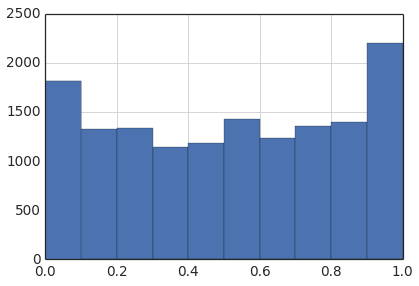

In [240]:
ff.hist()

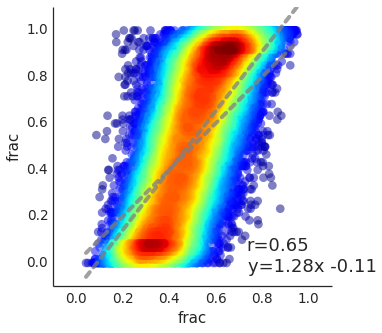

In [242]:
s1, s2 = match_series(dx_rna.frac, ff)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

In [243]:
r_luad = binomial_test_screen(matched_tn.ix[:, ti(codes == 'LUAD')], fc=1.)

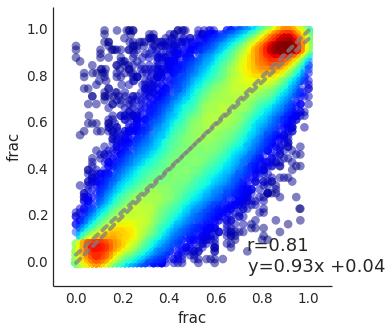

In [244]:
s1, s2 = match_series(r_luad.frac, ff)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

# Prostate Pannel

* Small pannel of genes

In [335]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE41969_series_matrix.txt'

In [336]:
meta = pd.read_table(f, nrows=33, skiprows=25, index_col=0)
df = pd.read_table(f, skiprows=61, index_col=0, names=meta.columns)
df = df.dropna()
cols = [(c.split(' ')[-1], '11' if 'normal' in c else '01')
         for c in df.columns]
df.columns = pd.MultiIndex.from_tuples(cols)
df =  df.div(df.sum())

In [323]:
r_prostate = binomial_test_screen(df, 1.)

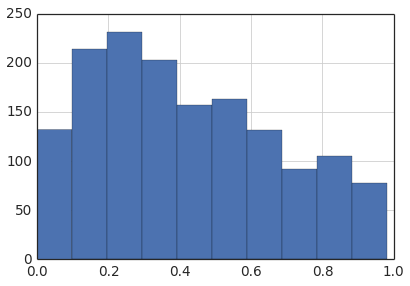

In [324]:
r_prostate.frac.hist()

In [325]:
r_prostate.sort('p').head()

,num_ox,num_dx,frac,p
GI_21614519-S-9,0,163,0.00,1.71e-49
GI_16506300-S-4,1,163,0.01,2.81e-47
GI_67763815-S-6,1,163,0.01,2.81e-47
GI_13325053-S-2,1,163,0.01,2.81e-47
GI_13904857-A-9,1,163,0.01,2.81e-47


In [348]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL16230-10654.txt'
mapping = pd.read_table(f, skiprows=14, index_col='ID', usecols=['ID','SYMBOL'],
                        squeeze=True)
d2 = df.groupby(mapping).mean()

In [349]:
r_prostate = binomial_test_screen(d2, 1.)

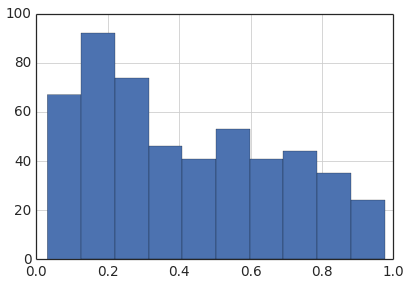

In [350]:
r_prostate.frac.hist()

In [351]:
r_prostate.sort('p').head()

,num_ox,num_dx,frac,p
SYMBOL,,,,
ALDH1A3,159,163,0.98,4.97e-42
NME1,158,163,0.97,1.59e-40
WNT1,5,163,0.03,1.59e-40
ERCC1,6,163,0.04,4.22e-39
REPS2,157,163,0.96,4.22e-39


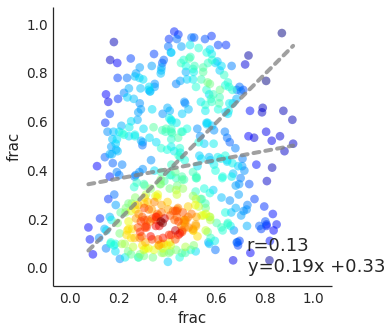

In [352]:
s1, s2 = match_series(dx_rna.frac, r_prostate.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

# Liver 

[GSE25097](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE25097)

In [353]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE25097_series_matrix.txt'

In [370]:
meta = pd.read_table(f, nrows=29, skiprows=26, index_col=0)
df = pd.read_table(f, skiprows=56, index_col=0, names=meta.columns)
df = df.dropna()
tissue = meta.iloc[6].replace({'tumor':'01', 'non_tumor':'11'})
cols = [(i.split()[-1],v) for i,v in tissue.iteritems()]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.sort_index(axis=1)

In [380]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL10687.txt'
mapping = pd.read_table(f, skiprows=7, index_col='ID', usecols=['ID','GeneSymbol'],
                        squeeze=True).dropna()

In [382]:
d2 = df.groupby(mapping).mean()

In [383]:
d2.shape

(18076, 557)

In [384]:
r_liver = binomial_test_screen(d2, 1.)

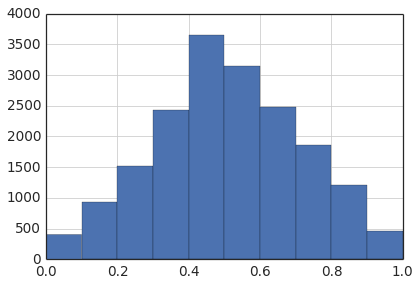

In [387]:
r_liver.frac.hist()

In [388]:
r_liver.sort('p').head()

,num_ox,num_dx,frac,p
GeneSymbol,,,,
FCN2,0,243,0,1.41e-73
MARCO,0,243,0,1.41e-73
GPM6A,0,243,0,1.41e-73
ECM1,0,243,0,1.41e-73
CCNB1,243,243,1,1.41e-73


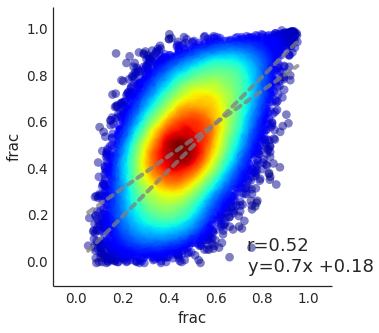

In [389]:
s1, s2 = match_series(dx_rna.frac, r_liver.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

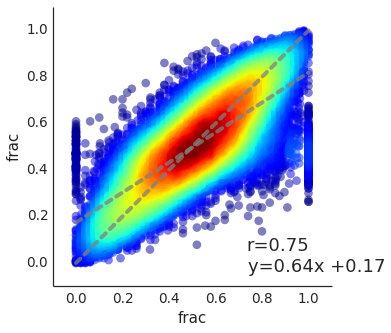

In [390]:
s1, s2 = match_series(rr3.frac, r_liver.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

# Liver Cancer

* [GSE14520](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE14520) 
* " We used Affymetrix microarray profiling to analyze gene expression patterns in healthy donor liver as well as tumor and paired non-tumor tissue of HCC patients."
* Also has clinical followup 
* Has a secondary array, I think I'll lump them together for now

In [392]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE14520-GPL3921_series_matrix.txt'

In [400]:
meta = pd.read_table(f, nrows=37, skiprows=37, index_col=0)
df = pd.read_table(f, skiprows=79, index_col=0, names=meta.columns)
df = df.dropna()
tissue = meta.iloc[8].map(lambda s: s.split(': ')[1])
tissue = tissue.replace({'Liver Tumor Tissue':'01', 'Liver Non-Tumor Tissue':'11'})
patient = meta.iloc[10].map(lambda s: s.split(': ')[1][:-1])
cols = [(patient[i], tissue[i]) for i in tissue.index]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.sort_index(axis=1)

In [428]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL3921-25447.txt'
mapping = pd.read_table(f, skiprows=16, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()

In [429]:
d2 = df.groupby(mapping).mean()

In [443]:
r_liver2 = binomial_test_screen(d2, 1.)

In [444]:
r_liver2.sort('p').head()

,num_ox,num_dx,frac,p
Gene Symbol,,,,
SNRPE,212,213,1.00,3.25e-62
PSMB4,212,213,1.00,3.25e-62
ECM1,1,213,0.00,3.25e-62
LCAT,1,213,0.00,3.25e-62
CCNB1,211,213,0.99,3.46e-60


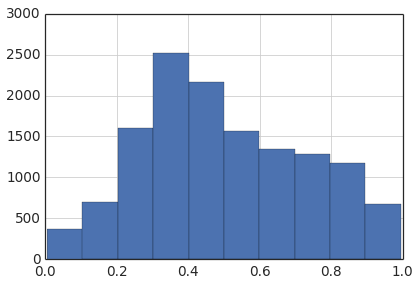

In [445]:
r_liver2.frac.hist()

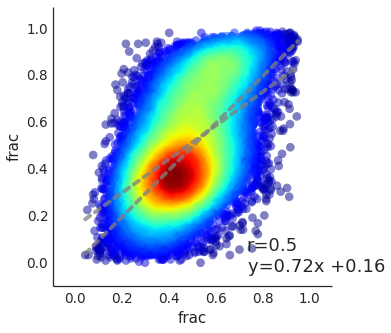

In [446]:
s1, s2 = match_series(dx_rna.frac, r_liver2.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

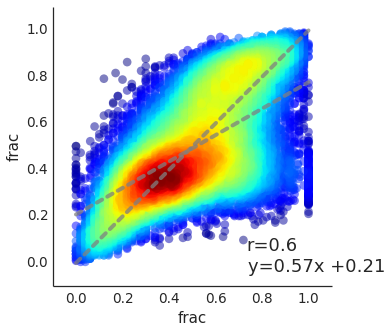

In [433]:
s1, s2 = match_series(rr3.frac, r_liver2.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

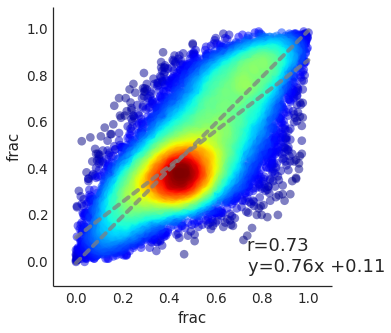

In [466]:
s1, s2 = match_series(r_liver.frac, r_liver2.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

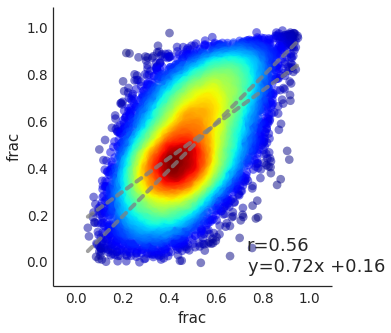

In [436]:
s1, s2 = match_series(dx_rna.frac, (r_liver.frac + r_liver2.frac) / 2)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

True     7216
False    6207
dtype: int64

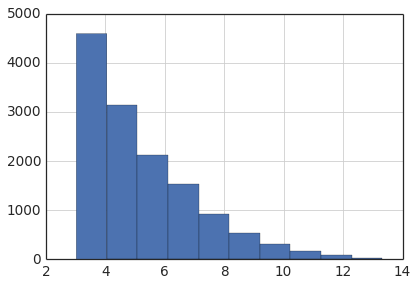

In [463]:
mm = d2.mean(1)
mm.hist()
(mm > 4.5).value_counts()

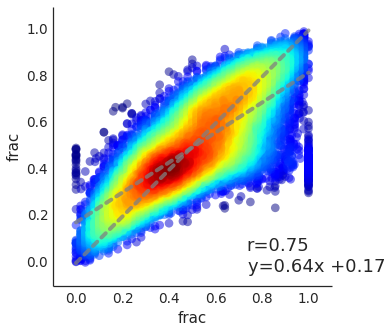

In [467]:
s1, s2 = match_series(rr3.frac, (r_liver.frac + r_liver2.frac) / 2)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

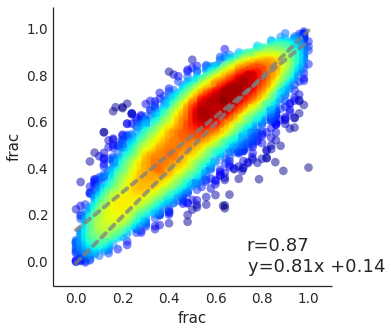

In [462]:
s1, s2 = match_series(rr3.frac, (r_liver.frac + r_liver2.frac).ix[ti(mm>4.5)] / 2)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

# Prostate

Fail

In [546]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE6919-GPL8300_series_matrix.txt'
meta1 = pd.read_table(f, nrows=35, skiprows=33, index_col=0)
df1 = pd.read_table(f, skiprows=70, index_col=0, names=meta1.columns).dropna()
f = '/cellar/users/agross/Data/DiffExp/Data/GPL8300-15672.txt'
mapping = pd.read_table(f, skiprows=16, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()
df1 = df1.groupby(mapping).mean()

f = '/cellar/users/agross/Data/DiffExp/Data/GSE6919-GPL93_series_matrix.txt'
meta2 = pd.read_table(f, nrows=35, skiprows=33, index_col=0)
df2 = pd.read_table(f, skiprows=70, index_col=0, names=meta2.columns).dropna()
f = '/cellar/users/agross/Data/DiffExp/Data/GPL93.txt'
mapping = pd.read_table(f, skiprows=16, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()
df2 = df2.groupby(mapping).mean()

f = '/cellar/users/agross/Data/DiffExp/Data/GSE6919-GPL92_series_matrix.txt'
meta3 = pd.read_table(f, nrows=35, skiprows=33, index_col=0)
df3 = pd.read_table(f, skiprows=70, index_col=0, names=meta3.columns).dropna()
f = '/cellar/users/agross/Data/DiffExp/Data/GPL92.txt'
mapping = pd.read_table(f, skiprows=16, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()
df3 = df3.groupby(mapping).mean()

df = pd.concat([df1, df2, df3], axis=1)
meta = pd.concat([meta1, meta2, meta3], axis=1)

In [551]:
def tissue_fx(s):
    if 'tumor samples from patient' in s:
        return '01'
    elif 'normal prostate tissue adjacent to tumor from patient' in s:
        return '11'
    elif 'metastatic prostate tumor samples' in s:
        return '06'
    else:
        return 
tissue = meta.iloc[6].map(tissue_fx)
patient = meta.iloc[6].map(lambda s: s.split(',')[0])
cols = [(patient[i], tissue[i]) for i in tissue.index]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.sort_index(axis=1)

In [553]:
r_prostate = binomial_test_screen(df, 1.)

In [554]:
r_prostate

Empty DataFrame
Columns: [(num_ox, 0), (num_dx, 1), (frac, 0), (p, 0), (p, 1)]
Index: []

# expO Project

* [GSE2109](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE2109)
* 2158 Samples, no matched normals 
* Maybe use for validation of association with stage?

In [568]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE2109_series_matrix.txt'

In [595]:
meta = pd.read_table(f, skiprows=52, nrows=59)

In [631]:
histology = meta.applymap(lambda s: 'Histology:' in s if type(s) is str else False)
histology = meta[histology].T.stack()
print histology.groupby(level=0).size().value_counts()
histology.index = histology.index.droplevel(1)
histology = histology.str.replace('Histology: ','')

1    2036
dtype: int64


In [635]:
histology.value_counts().head()

Adenocarcinoma                               323
Ductal Carcinoma                             273
Conventional (clear cell) renal carcinoma    180
Endometrioid carcinoma                       143
Adenocarcinoma, NOS                          115
dtype: int64

# Colon

* [GSE44076](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE44076)
* Has 50 healthy samples, I'm going to toss them for now 
* http://www.colonomics.org 
* All stage II without adjuvent therepy 
* No MSI tumors 
* Also have miRNA and methylation

Gene expression profiles of paired normal adjacent mucosa and tumor samples from 98 individuals and 50 healthy colon mucosae, were obtained through Affymetrix Human Genome U219 Arrays.

In [668]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE44076_series_matrix.txt'
meta = pd.read_table(f, nrows=36, skiprows=41, index_col=0, low_memory=False)
df = pd.read_table(f, skiprows=79, index_col=0, names=meta.columns)

In [669]:
tissue = meta.iloc[6].replace({'Normal distant colon mucosa cells': '11',
                               'Primary colon adenocarcinoma cells': '01',
                               'Healthy colon mucosa cells': 'N'})
patient = meta.iloc[9].map(lambda s: s.split()[-1])
cols = [(patient[i], tissue[i]) for i in tissue.index]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.sort_index(axis=1).dropna()

In [677]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL13667-15572.txt'
mapping = pd.read_table(f, skiprows=43, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()
d2 = df.groupby(mapping).mean()

In [679]:
r_colon = binomial_test_screen(d2, fc=1.)

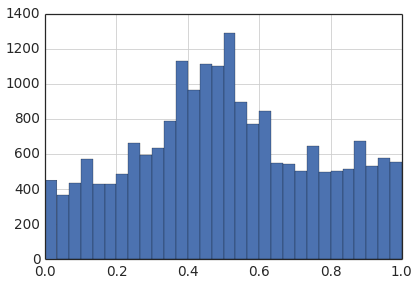

In [690]:
r_colon.frac.hist(bins=30)

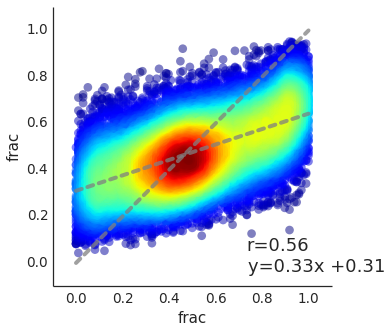

In [685]:
s1, s2 = match_series(r_colon.frac, dx_rna.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

In [686]:
tcga_coad = binomial_test_screen(matched_tn.ix[:, ti(codes == 'COAD')], fc=1.)

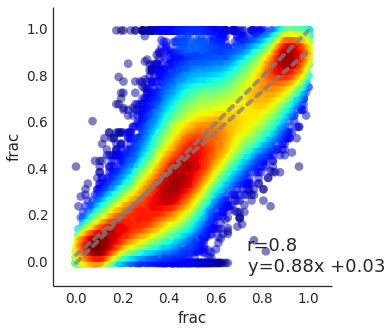

In [687]:
s1, s2 = match_series(r_colon.frac, tcga_coad.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

# Prostate

* [GSE21032](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE21032) 
* Expression  miRNA, and copy number 
* Only ~30 matched, may not be worth it but miRNA and mRNA

# Grab bag study

* [GSE5364](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE5364) 
* Handfull of different tissues 

The training set used in this study comprises 341 samples (270 tumors and 71 matched normals) from patients with breast, colon, liver, lung, oesophagal and thyroid cancer (Tissue Type/Tumor/Normal : Lung/18/12, Thyroid/35/16, Liver/9/8, Oesophagus/16/13, Colon/9/9, Breast/183/13.) 

In [711]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE5364_series_matrix.txt'
meta = pd.read_table(f, nrows=32, skiprows=26, index_col=0, low_memory=False)
df = pd.read_table(f, skiprows=60, index_col=0, names=meta.columns)

In [712]:
cols = [(c.split()[0] + '_' + c.split()[-1], '11' if 'normal' in c.lower() else '01') 
        for c in df.columns]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.dropna()
df = df.sort_index(axis=1)

In [717]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL96-15653.txt'
mapping = pd.read_table(f, skiprows=16, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()
d2 = df.groupby(mapping).mean()

In [718]:
r_gb = binomial_test_screen(d2, fc=1.)

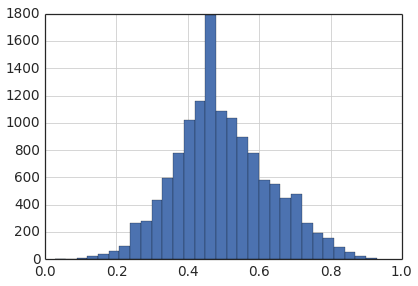

In [719]:
r_gb.frac.hist(bins=30)

In [723]:
r_gb.sort('p').head(10)

,num_ox,num_dx,frac,p
Gene Symbol,,,,
ADH1B,2,71,0.03,2.17e-18
TNXA /// TNXB,4,71,0.06,8.74e-16
RPN2,66,71,0.93,1.19e-14
SRPX,6,71,0.08,1.33e-13
ITM2A,6,71,0.08,1.33e-13
ZWILCH,65,71,0.92,1.33e-13
UBFD1,65,71,0.92,1.33e-13
GINS2,65,71,0.92,1.33e-13
CEP55,65,71,0.92,1.33e-13


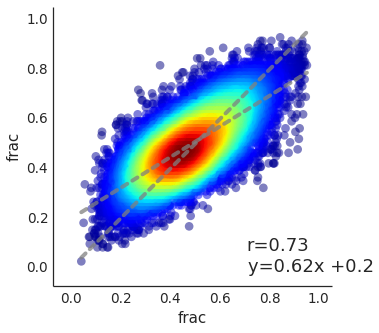

In [721]:
s1, s2 = match_series(dx_rna.frac, r_gb.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

# Colorectal Cancers and Metastases

In [738]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE41258_series_matrix.txt'
meta = pd.read_table(f, nrows=45, skiprows=33, index_col=0, low_memory=False)
df = pd.read_table(f, skiprows=80, index_col=0, names=meta.columns)

In [739]:
patient = meta.iloc[10].map(lambda s: s.split()[-1])
def tissue_fx(s):
    if 'Tumor' in s:
        return '01'
    if 'Normal' in s:
        return '11'
    if 'Metastasis' in s:
        return '06'
    else:
        return s.split(': ')[-1]
tissue = meta.iloc[8].map(tissue_fx)

cols = [(patient[i], tissue[i]) for i in tissue.index]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.sort_index(axis=1).dropna()

In [749]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL96-15653.txt'
mapping = pd.read_table(f, skiprows=16, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()
d2 = df.groupby(mapping).mean()

In [750]:
r_crc = binomial_test_screen(d2, fc=1.)

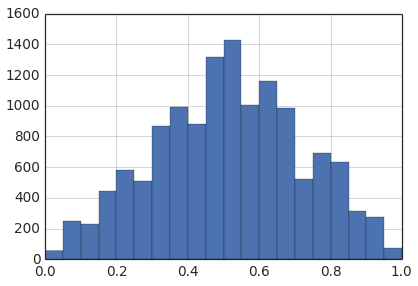

In [753]:
r_crc.frac.hist(bins=20)

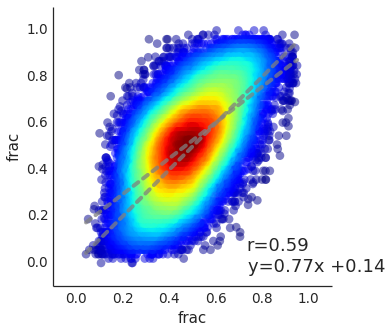

In [751]:
s1, s2 = match_series(dx_rna.frac, r_crc.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

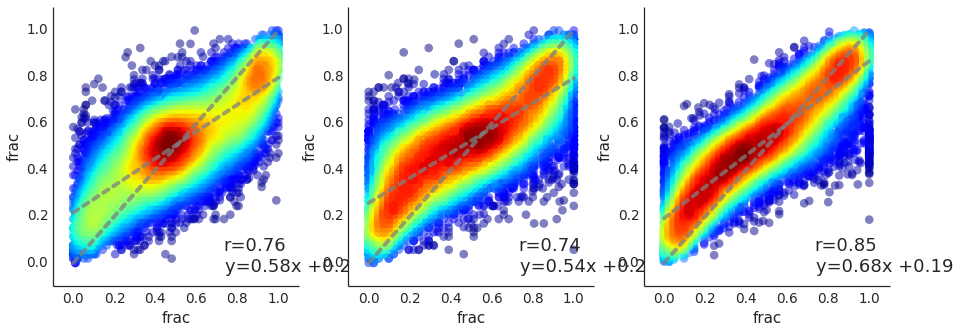

In [760]:
fig, axs = subplots(1,3, figsize=(15,5))
s1, s2 = match_series(r_colon.frac, r_crc.frac)
plot_regression(s1, s2, rad=0.1, density=True, ax=axs[0])
s1, s2 = match_series(tcga_coad.frac, r_crc.frac)
plot_regression(s1, s2, rad=0.1, density=True, ax=axs[1])
s1, s2 = match_series(tcga_coad.frac, (r_crc.frac + r_colon.frac) / 2)
plot_regression(s1, s2, rad=0.1, density=True, ax=axs[2])

# Lung miRNA

* [GSE15008](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE15008)
* Uses weird mamalian chip 
* I'm averaging replicates, might be better way to do this

In [775]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE15008_series_matrix.txt'
meta = pd.read_table(f, nrows=30, skiprows=27, index_col=0, low_memory=False)
df = pd.read_table(f, skiprows=59, index_col=0, names=meta.columns)

cols = [(c.split(' ')[-1].split('-')[0], '11' if 'normal' in c else '01')
         for c in df.columns]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.sort_index(axis=0).dropna()
df = df.groupby(axis=1, level=[0,1]).mean() #averaging replicates

In [785]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL8176.txt'
mapping = pd.read_table(f, skiprows=6, index_col='ID', usecols=['ID','miRNA_ID'],
                        squeeze=True).dropna()
d2 = df.groupby(mapping).mean()
d2.index = d2.index.map(str.lower)

In [786]:
r_lung_mir = binomial_test_screen(d2, fc=1.)

In [807]:
r_lung_mir.sort('p').head()

,num_ox,num_dx,frac,p
hsa-mir-145,7,118,0.06,3.38e-25
hsa-mir-487a,10,118,0.08,6.45e-22
hsa-mir-30a,11,118,0.09,6.40e-21
hsa-mir-210,105,118,0.89,4.76e-19
hsa-mir-182,105,118,0.89,4.76e-19


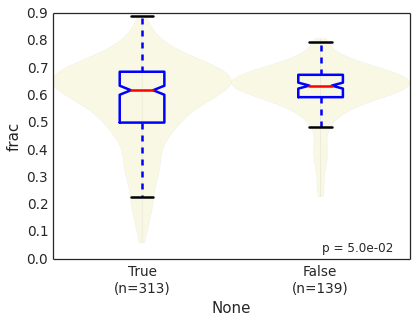

In [803]:
hsa = pd.Series(r_lung_mir.index.map(lambda s: s[:3] == 'hsa'), r_lung_mir.index)
violin_plot_pandas(hsa, r_lung_mir.frac)

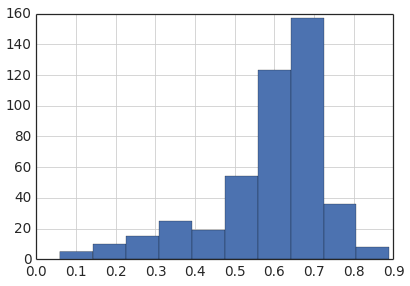

In [797]:
r_lung_mir.frac.hist()

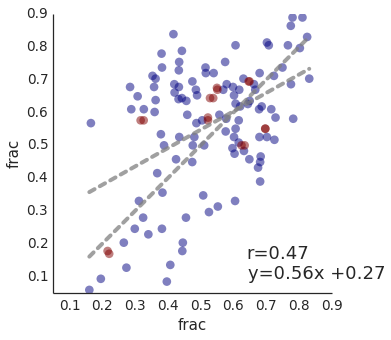

In [806]:
s1, s2 = match_series(dx_mir.frac, r_lung_mir.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.01, density=True, ax=ax)

# Early stage, smoker NSCLC

* [GSE40407](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE40407)
* Don't think its actual tumor measurments
* May want to check for followup, not sure what to do

In [808]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE40407_series_matrix.txt'
meta = pd.read_table(f, nrows=34, skiprows=27, index_col=0, low_memory=False)
df = pd.read_table(f, skiprows=63, index_col=0, names=meta.columns)

In [824]:
patient = meta.iloc[9].map(lambda s: s.split()[-1])
time_point = meta.iloc[12].map(lambda s: s.split()[-1])
site = pd.Series(meta.columns.map(lambda s: s.split('_')[1]), meta.columns)
tumor_site = meta.iloc[10].map(lambda s: s.split()[-1])

In [ ]:
df.columns

In [825]:
(site == tumor_site).value_counts()

False    350
True      41
dtype: int64

In [818]:
time_point.value_counts()

24    113
0     109
12    108
36     61
dtype: int64

# Liver miRNA

### mRNA

* PROBABLY SAME mRNA Data as other set

In [826]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE22058-GPL6793_series_matrix.txt'
meta = pd.read_table(f, nrows=31, skiprows=52, index_col=0, low_memory=False)
df = pd.read_table(f, skiprows=85, index_col=0, names=meta.columns)

In [835]:
tissue = meta.iloc[9].map(lambda s: s.split(': ')[-1])
tissue = tissue.replace({'liver tumor':'01', 'adjacent liver non-tumor': '11'})
patient = meta.iloc[8].map(lambda s: s.split(': ')[-1])
cols = [(patient[i], tissue[i]) for i in tissue.index]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.sort_index(axis=1).dropna()

In [838]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL6793.txt'
mapping = pd.read_table(f, skiprows=7, index_col='ID', usecols=['ID','GeneSymbol'],
                        squeeze=True).dropna()
d2 = df.groupby(mapping).mean()

In [839]:
r_liver_merc = binomial_test_screen(d2, fc=1.)

In [842]:
r_liver_merc.sort('p').head()

,num_ox,num_dx,frac,p
GeneSymbol,,,,
LIFR,0,105,0,4.93e-32
CLEC4M,0,105,0,4.93e-32
CDC25C,105,105,1,4.93e-32
ANLN,105,105,1,4.93e-32
DBH,0,105,0,4.93e-32


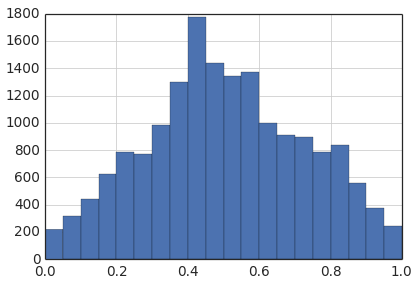

In [844]:
r_liver_merc.frac.hist(bins=20)

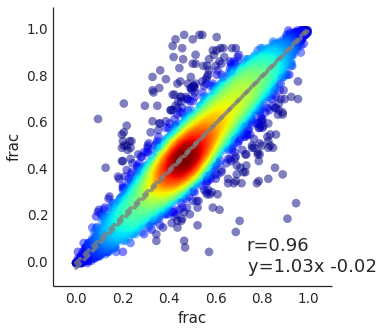

In [846]:
s1, s2 = match_series(r_liver.frac, r_liver_merc.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.1, density=True, ax=ax)

### miRNA

In [6]:
f = '/cellar/users/agross/Data/DiffExp/Data/GSE22058-GPL10457_series_matrix.txt'
meta = pd.read_table(f, nrows=30, skiprows=52, index_col=0)
df = pd.read_table(f, skiprows=85, index_col=0, header=None)

In [10]:
tissue = meta.iloc[9].map(lambda s: s.split(': ')[-1])
tissue = tissue.replace({'liver tumor':'01', 'adjacent liver non-tumor': '11'})
patient = meta.iloc[8].map(lambda s: s.split(': ')[-1])
cols = [(patient[i], tissue[i]) for i in tissue.index]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.sort_index(axis=1).dropna()

In [13]:
f = '/cellar/users/agross/Data/DiffExp/Data/GPL10457.txt'
mapping = pd.read_table(f, skiprows=5, index_col='ID', usecols=['ID','miRNA_ID'],
                        squeeze=True).dropna()
d2 = df.groupby(mapping).mean()

In [14]:
r_liver_mir = binomial_test_screen(d2, 1.)

In [18]:
r_liver_mir.sort('p').head()

,num_ox,num_dx,frac,p
miRNA_ID,,,,
hsa-mir-93,94,96,0.98,1.18e-25
hsa-mir-106b,94,96,0.98,1.18e-25
hsa-mir-188,93,96,0.97,3.72e-24
hsa-mir-450,6,96,0.06,2.50e-20
hsa-mir-18a,89,96,0.93,3.26e-19


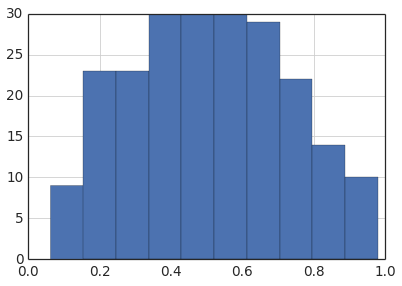

In [17]:
r_liver_mir.frac.hist(bins=10)

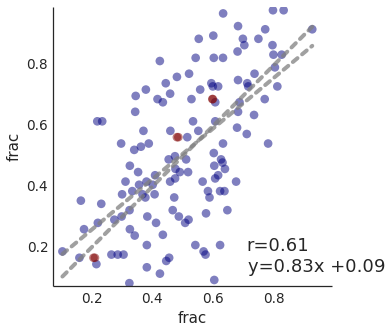

In [19]:
s1, s2 = match_series(dx_mir.frac, r_liver_mir.frac)
fig, ax = subplots(figsize=(5, 5))
plot_regression(s1, s2, rad=0.01, density=True, ax=ax)